In [1]:
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import autosklearn.classification

In [5]:
df=pd.read_csv('/content/mydrive/MyDrive/AutoML/customer_churn.csv')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [7]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [8]:
#Handling binary data
cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']
for i in cols:
  encoded = pd.get_dummies(df[i])
  df = pd.concat((df, encoded), axis=1)
  df.drop([i], axis=1, inplace=True)
  if i == 'Gender':
    df.drop(["Male"], axis=1, inplace=True)
    df.rename(columns={"Female": i}, inplace=True)
  else:
    df.drop(["No"], axis=1, inplace=True)
    df.rename(columns={"Yes": i}, inplace=True)

In [10]:
#Handling City values
encoded = pd.get_dummies(df['City'])
df = pd.concat((df, encoded), axis=1)
df.drop(['City'], axis=1, inplace=True)
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Tenure Months', 'Multiple Lines',
       ...
       'Yermo', 'Yorba Linda', 'Yorkville', 'Yosemite National Park',
       'Yountville', 'Yreka', 'Yuba City', 'Yucaipa', 'Yucca Valley', 'Zenia'],
      dtype='object', length=1161)

In [11]:
#Handling Multiple Lines values
encoded = pd.get_dummies(df['Multiple Lines'])
df = pd.concat((df, encoded), axis=1)
df.drop(['Multiple Lines'], axis=1, inplace=True)
df.rename(columns={"No": 'Multiple Lines No', "No phone service":'Multiple Lines NoPS', "Yes":'Multiple Lines Yes'}, inplace=True)
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Tenure Months', 'Internet Service',
       ...
       'Yosemite National Park', 'Yountville', 'Yreka', 'Yuba City', 'Yucaipa',
       'Yucca Valley', 'Zenia', 'Multiple Lines No', 'Multiple Lines NoPS',
       'Multiple Lines Yes'],
      dtype='object', length=1163)

In [12]:
#Handling Internet Service values
encoded = pd.get_dummies(df['Internet Service'])
df = pd.concat((df, encoded), axis=1)
df.drop(['Internet Service'], axis=1, inplace=True)
df.rename(columns={"DSL": 'Internet Service DSL', "Fiber optic":'Internet Service FO', "No":'Internet Service No'}, inplace=True)
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Tenure Months', 'Online Security',
       ...
       'Yuba City', 'Yucaipa', 'Yucca Valley', 'Zenia', 'Multiple Lines No',
       'Multiple Lines NoPS', 'Multiple Lines Yes', 'Internet Service DSL',
       'Internet Service FO', 'Internet Service No'],
      dtype='object', length=1165)

In [13]:
#Handling Online Security values
encoded = pd.get_dummies(df['Online Security'])
df = pd.concat((df, encoded), axis=1)
df.drop(['Online Security'], axis=1, inplace=True)
df.rename(columns={"No": 'Online Security No', "No internet service":'Online Security NoIS', "Yes":'Online Security Yes'}, inplace=True)
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Tenure Months', 'Online Backup',
       ...
       'Zenia', 'Multiple Lines No', 'Multiple Lines NoPS',
       'Multiple Lines Yes', 'Internet Service DSL', 'Internet Service FO',
       'Internet Service No', 'Online Security No', 'Online Security NoIS',
       'Online Security Yes'],
      dtype='object', length=1167)

In [14]:
#Handling Online Backup values
encoded = pd.get_dummies(df['Online Backup'])
df = pd.concat((df, encoded), axis=1)
df.drop(['Online Backup'], axis=1, inplace=True)
df.rename(columns={"No": 'Online Backup No', "No internet service":'Online Backup NoIS', "Yes":'Online Backup Yes'}, inplace=True)
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Tenure Months', 'Device Protection',
       ...
       'Multiple Lines Yes', 'Internet Service DSL', 'Internet Service FO',
       'Internet Service No', 'Online Security No', 'Online Security NoIS',
       'Online Security Yes', 'Online Backup No', 'Online Backup NoIS',
       'Online Backup Yes'],
      dtype='object', length=1169)

In [15]:
#Handling Device Protection values
encoded = pd.get_dummies(df['Device Protection'])
df = pd.concat((df, encoded), axis=1)
df.drop(['Device Protection'], axis=1, inplace=True)
df.rename(columns={"No": 'Device Protection No', "No internet service":'Device Protection NoIS', "Yes":'Device Protection Yes'}, inplace=True)
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Tenure Months', 'Tech Support',
       ...
       'Internet Service No', 'Online Security No', 'Online Security NoIS',
       'Online Security Yes', 'Online Backup No', 'Online Backup NoIS',
       'Online Backup Yes', 'Device Protection No', 'Device Protection NoIS',
       'Device Protection Yes'],
      dtype='object', length=1171)

In [16]:
#Handling Tech Support values
encoded = pd.get_dummies(df['Tech Support'])
df = pd.concat((df, encoded), axis=1)
df.drop(['Tech Support'], axis=1, inplace=True)
df.rename(columns={"No": 'Tech Support No', "No internet service":'Tech Support NoIS', "Yes":'Tech Support Yes'}, inplace=True)
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Tenure Months', 'Streaming TV',
       ...
       'Online Security Yes', 'Online Backup No', 'Online Backup NoIS',
       'Online Backup Yes', 'Device Protection No', 'Device Protection NoIS',
       'Device Protection Yes', 'Tech Support No', 'Tech Support NoIS',
       'Tech Support Yes'],
      dtype='object', length=1173)

In [17]:
#Handling Streaming TV values
encoded = pd.get_dummies(df['Streaming TV'])
df = pd.concat((df, encoded), axis=1)
df.drop(['Streaming TV'], axis=1, inplace=True)
df.rename(columns={"No": 'Streaming TV No', "No internet service":'Streaming TV NoIS', "Yes":'Streaming TV Yes'}, inplace=True)
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Tenure Months', 'Streaming Movies',
       ...
       'Online Backup Yes', 'Device Protection No', 'Device Protection NoIS',
       'Device Protection Yes', 'Tech Support No', 'Tech Support NoIS',
       'Tech Support Yes', 'Streaming TV No', 'Streaming TV NoIS',
       'Streaming TV Yes'],
      dtype='object', length=1175)

In [18]:
#Handling Streaming Movies values
encoded = pd.get_dummies(df['Streaming Movies'])
df = pd.concat((df, encoded), axis=1)
df.drop(['Streaming Movies'], axis=1, inplace=True)
df.rename(columns={"No": 'Streaming Movies No', "No internet service":'Streaming Movies NoIS', "Yes":'Streaming Movies Yes'}, inplace=True)
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Tenure Months', 'Contract',
       ...
       'Device Protection Yes', 'Tech Support No', 'Tech Support NoIS',
       'Tech Support Yes', 'Streaming TV No', 'Streaming TV NoIS',
       'Streaming TV Yes', 'Streaming Movies No', 'Streaming Movies NoIS',
       'Streaming Movies Yes'],
      dtype='object', length=1177)

In [19]:
#Handling Contract values
encoded = pd.get_dummies(df['Contract'])
df = pd.concat((df, encoded), axis=1)
df.drop(['Contract'], axis=1, inplace=True)
df.rename(columns={"Month-to-month": 'Contract MtM', "One year":'Contract OneY', "Two year":'ContractTwoY'}, inplace=True)
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Tenure Months', 'Payment Method',
       ...
       'Tech Support Yes', 'Streaming TV No', 'Streaming TV NoIS',
       'Streaming TV Yes', 'Streaming Movies No', 'Streaming Movies NoIS',
       'Streaming Movies Yes', 'Contract MtM', 'Contract OneY',
       'ContractTwoY'],
      dtype='object', length=1179)

In [20]:
#Handling Payment Method values
encoded = pd.get_dummies(df['Payment Method'])
df = pd.concat((df, encoded), axis=1)
df.drop(['Payment Method'], axis=1, inplace=True)
df.rename(columns={"Bank transfer (automatic)": 'Payment Method BT', "Credit card (automatic)":'Payment Method CC', "Electronic check":'Payment Method EC', "Mailed check":'Payment Method MC'}, inplace=True)
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       ...
       'Streaming Movies No', 'Streaming Movies NoIS', 'Streaming Movies Yes',
       'Contract MtM', 'Contract OneY', 'ContractTwoY', 'Payment Method BT',
       'Payment Method CC', 'Payment Method EC', 'Payment Method MC'],
      dtype='object', length=1182)

In [21]:
#Type casting
#"Latitude":'float64', "Longitude":'float64'
#"Monthly Charges":'float64', "Total Charges":'float64'
df = df.astype({"Zip Code":'int64', "Tenure Months":'int64'})

In [22]:
#creating X and y 
X=df.drop(['CustomerID', 'Count', 'Country', 'State', 'Lat Long', 'Churn Value', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'],axis=1)
y=df['Churn Value']

#split into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((5634, 1172), (1409, 1172), (5634,), (1409,))

In [23]:
df['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

In [29]:
automl1 = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=10*60,
    per_run_time_limit=50,
    tmp_folder='/temp/classification')
automl1.fit(X_train, y_train)
print(automl1.sprint_statistics())
print(automl1.leaderboard())
# print(automl.show_models())

/usr/local/lib/python3.8/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Total Charges has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(


auto-sklearn results:
  Dataset name: 5e4b7054-b4dc-11ed-bfbc-0242ac1c000c
  Metric: accuracy
  Best validation score: 0.802688
  Number of target algorithm runs: 17
  Number of successful target algorithm runs: 8
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 5
  Number of target algorithms that exceeded the memory limit: 4

          rank  ensemble_weight               type      cost   duration
model_id                                                               
16           1             0.26  gradient_boosting  0.197312  11.674278
6            2             0.16  gradient_boosting  0.203226  17.787648
3            3             0.06      random_forest  0.212903  48.934574
11           4             0.22      random_forest  0.212903  41.829784
9            5             0.10                lda  0.224194  30.875387
13           6             0.20        extra_trees  0.244086   8.836095


Comments: More the search time and run time, better are the chances of finding models with improved performance

In [31]:
automl3 = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=10*60,
    per_run_time_limit=50,
    tmp_folder='/temp/classification',
    ensemble_kwargs={"ensemble_size": 1})
automl3.fit(X_train, y_train)
print(automl3.sprint_statistics())
print(automl3.leaderboard())

/usr/local/lib/python3.8/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Total Charges has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(


auto-sklearn results:
  Dataset name: b4c07993-b4e0-11ed-bfbc-0242ac1c000c
  Metric: accuracy
  Best validation score: 0.802688
  Number of target algorithm runs: 17
  Number of successful target algorithm runs: 8
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 5
  Number of target algorithms that exceeded the memory limit: 4

          rank  ensemble_weight               type      cost   duration
model_id                                                               
16           1              1.0  gradient_boosting  0.197312  16.646359


In [30]:
automl2 = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=10*60,
    per_run_time_limit=50,
    tmp_folder='/temp/classification',
    ensemble_kwargs={"ensemble_size": 1},
    initial_configurations_via_metalearning=0)
automl2.fit(X_train, y_train)
print(automl2.sprint_statistics())
print(automl2.leaderboard())

/usr/local/lib/python3.8/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Total Charges has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(


auto-sklearn results:
  Dataset name: 0fbde801-b4de-11ed-bfbc-0242ac1c000c
  Metric: accuracy
  Best validation score: 0.803226
  Number of target algorithm runs: 50
  Number of successful target algorithm runs: 14
  Number of crashed target algorithm runs: 34
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 1

          rank  ensemble_weight type      cost   duration
model_id                                                 
24           1              1.0  sgd  0.196774  16.948653


Inference: AutoML2 with no ensemble SGD model has better performance, considering validation score as a metric

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred= automl2.predict(X_test)

# Score of the final ensemble
from sklearn.metrics import accuracy_score
m1_acc_score= accuracy_score(y_test, y_pred)
m1_acc_score

0.8048261178140526

<AxesSubplot:>

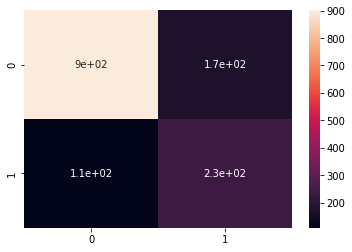

In [33]:
conf_matrix= confusion_matrix(y_pred, y_test)
sns.heatmap(conf_matrix, annot=True)

In [34]:
#Handling oversampling and undersampling
from sklearn.utils import resample
healthy= df[df["Churn Value"]==0]
unhealthy=df[df["Churn Value"]==1]

up_sampled=resample(healthy, replace=True, n_samples=len(unhealthy), random_state=42)
up_sampled=pd.concat([unhealthy, up_sampled])
#check updated class counts
up_sampled['Churn Value'].value_counts()

1    1869
0    1869
Name: Churn Value, dtype: int64

In [35]:
#creating X and y 
X2=df.drop(['CustomerID', 'Count', 'Country', 'State', 'Lat Long', 'Churn Value', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'],axis=1)
y2=df['Churn Value']

#split into train and test sets
X2_train, X2_test, y2_train, y2_test= train_test_split(X2,y2, test_size=0.2, random_state=42)
X2_train.shape, X2_test.shape,y2_train.shape, y2_test.shape

((5634, 1172), (1409, 1172), (5634,), (1409,))

In [36]:
automl4 = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=10*60,
    per_run_time_limit=50,
    tmp_folder='/temp/classification')
automl4.fit(X2_train, y2_train)
print(automl4.sprint_statistics())
print(automl4.leaderboard())
# print(automl.show_models())

/usr/local/lib/python3.8/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Total Charges has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(


auto-sklearn results:
  Dataset name: 6ee6ef62-b4e3-11ed-bfbc-0242ac1c000c
  Metric: accuracy
  Best validation score: 0.802688
  Number of target algorithm runs: 17
  Number of successful target algorithm runs: 7
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 6
  Number of target algorithms that exceeded the memory limit: 4

          rank  ensemble_weight               type      cost   duration
model_id                                                               
16           1             0.18  gradient_boosting  0.197312  12.059726
6            2             0.20  gradient_boosting  0.203226  17.272028
11           3             0.04      random_forest  0.212903  43.899666
9            4             0.38                lda  0.224194  30.414040
13           5             0.20        extra_trees  0.244086   9.968712


In [37]:
automl5 = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=10*60,
    per_run_time_limit=50,
    tmp_folder='/temp/classification',
    ensemble_kwargs={"ensemble_size": 1})
automl5.fit(X2_train, y2_train)
print(automl5.sprint_statistics())
print(automl5.leaderboard())

/usr/local/lib/python3.8/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Total Charges has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(


auto-sklearn results:
  Dataset name: e78885b4-b4e4-11ed-bfbc-0242ac1c000c
  Metric: accuracy
  Best validation score: 0.802688
  Number of target algorithm runs: 17
  Number of successful target algorithm runs: 8
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 5
  Number of target algorithms that exceeded the memory limit: 4

          rank  ensemble_weight               type      cost   duration
model_id                                                               
16           1              1.0  gradient_boosting  0.197312  13.557859


In [38]:
automl6 = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=10*60,
    per_run_time_limit=50,
    tmp_folder='/temp/classification',
    ensemble_kwargs={"ensemble_size": 1},
    initial_configurations_via_metalearning=0)
automl6.fit(X_train, y_train)
print(automl6.sprint_statistics())
print(automl6.leaderboard())

/usr/local/lib/python3.8/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column Total Charges has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(


auto-sklearn results:
  Dataset name: 0f5fae11-b4e9-11ed-bfbc-0242ac1c000c
  Metric: accuracy
  Best validation score: 0.803226
  Number of target algorithm runs: 50
  Number of successful target algorithm runs: 14
  Number of crashed target algorithm runs: 34
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 1

          rank  ensemble_weight type      cost   duration
model_id                                                 
24           1              1.0  sgd  0.196774  15.866233


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred= automl6.predict(X_test)

# Score of the final ensemble
from sklearn.metrics import accuracy_score
m2_acc_score= accuracy_score(y_test, y_pred)
m2_acc_score

0.8048261178140526

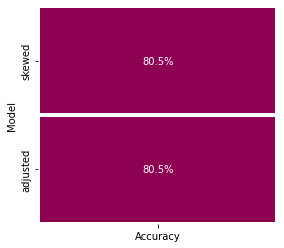

In [40]:
model_eval = pd.DataFrame({'Model': ['skewed','adjusted'], 'Accuracy': [m1_acc_score,m2_acc_score]})
model_eval = model_eval.set_index('Model').sort_values(by='Accuracy',ascending=False)
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.8, hspace=0.8)
ax0 = fig.add_subplot(gs[0, 0])
sns.heatmap(model_eval,cmap="PiYG",annot=True,fmt=".1%", linewidths=4,cbar=False,ax=ax0)
plt.show()

There's no effect on over/undersampling on this dataset

In [42]:
import pickle
# save the model 
filename = '/content/mydrive/MyDrive/AutoML/churn_model.sav' 
pickle.dump(automl2, open(filename, 'wb'))

In [43]:
#load the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8048261178140526
